In [2]:
pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from ultralytics import YOLO

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet


from roboflow import Roboflow
rf = Roboflow(api_key="Ztrni2ePZEBOO7ZJZMUk")
project = rf.workspace("varun-yvyoy").project("idp-apuvb")
dataset = project.version(1).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.117, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to idp-1 in yolov8:: 100%|██████████| 548/548 [00:00<00:00, 2046.64it/s]


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 302MB/s]
Ultralytics YOLOv8.0.117 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/idp-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=tor

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png
confusion_matrix_normalized.png			    results.csv
confusion_matrix.png				    results.png
events.out.tfevents.1686738925.e6b3f7678dd1.1650.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
labels_correlogram.jpg				    train_batch2.jpg
labels.jpg					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    weights


In [10]:
from IPython.display import display, Image

/content


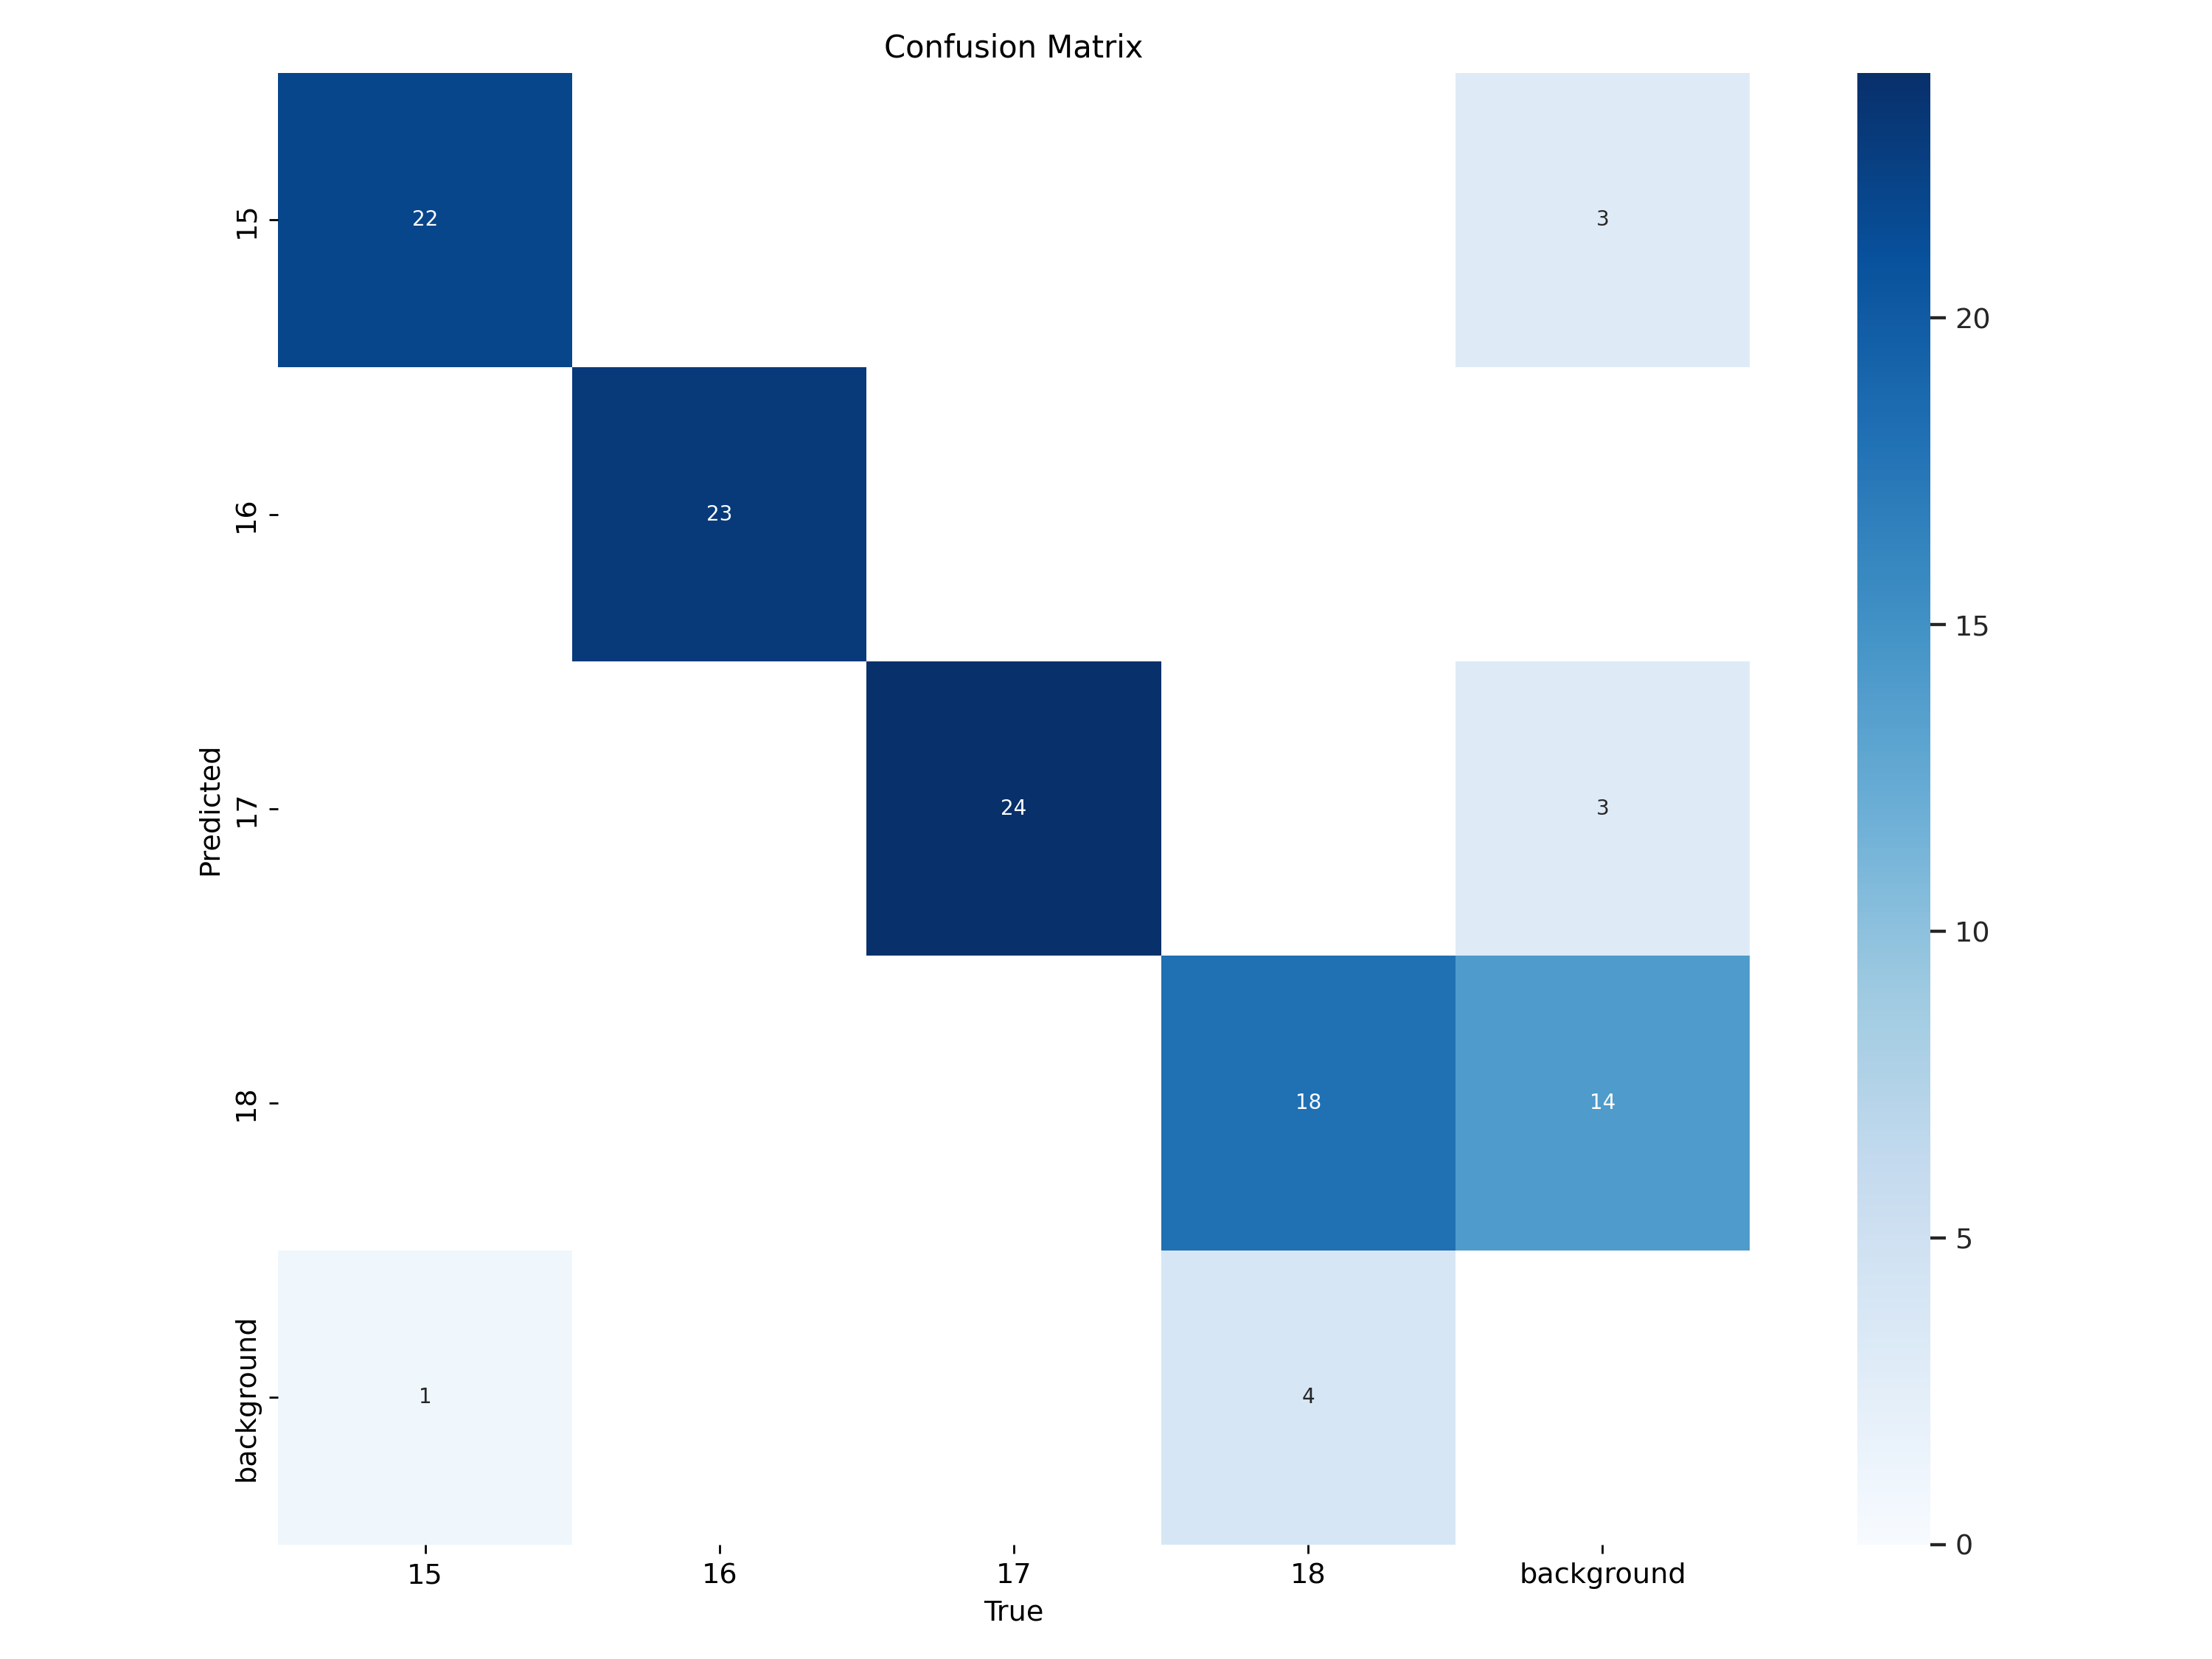

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


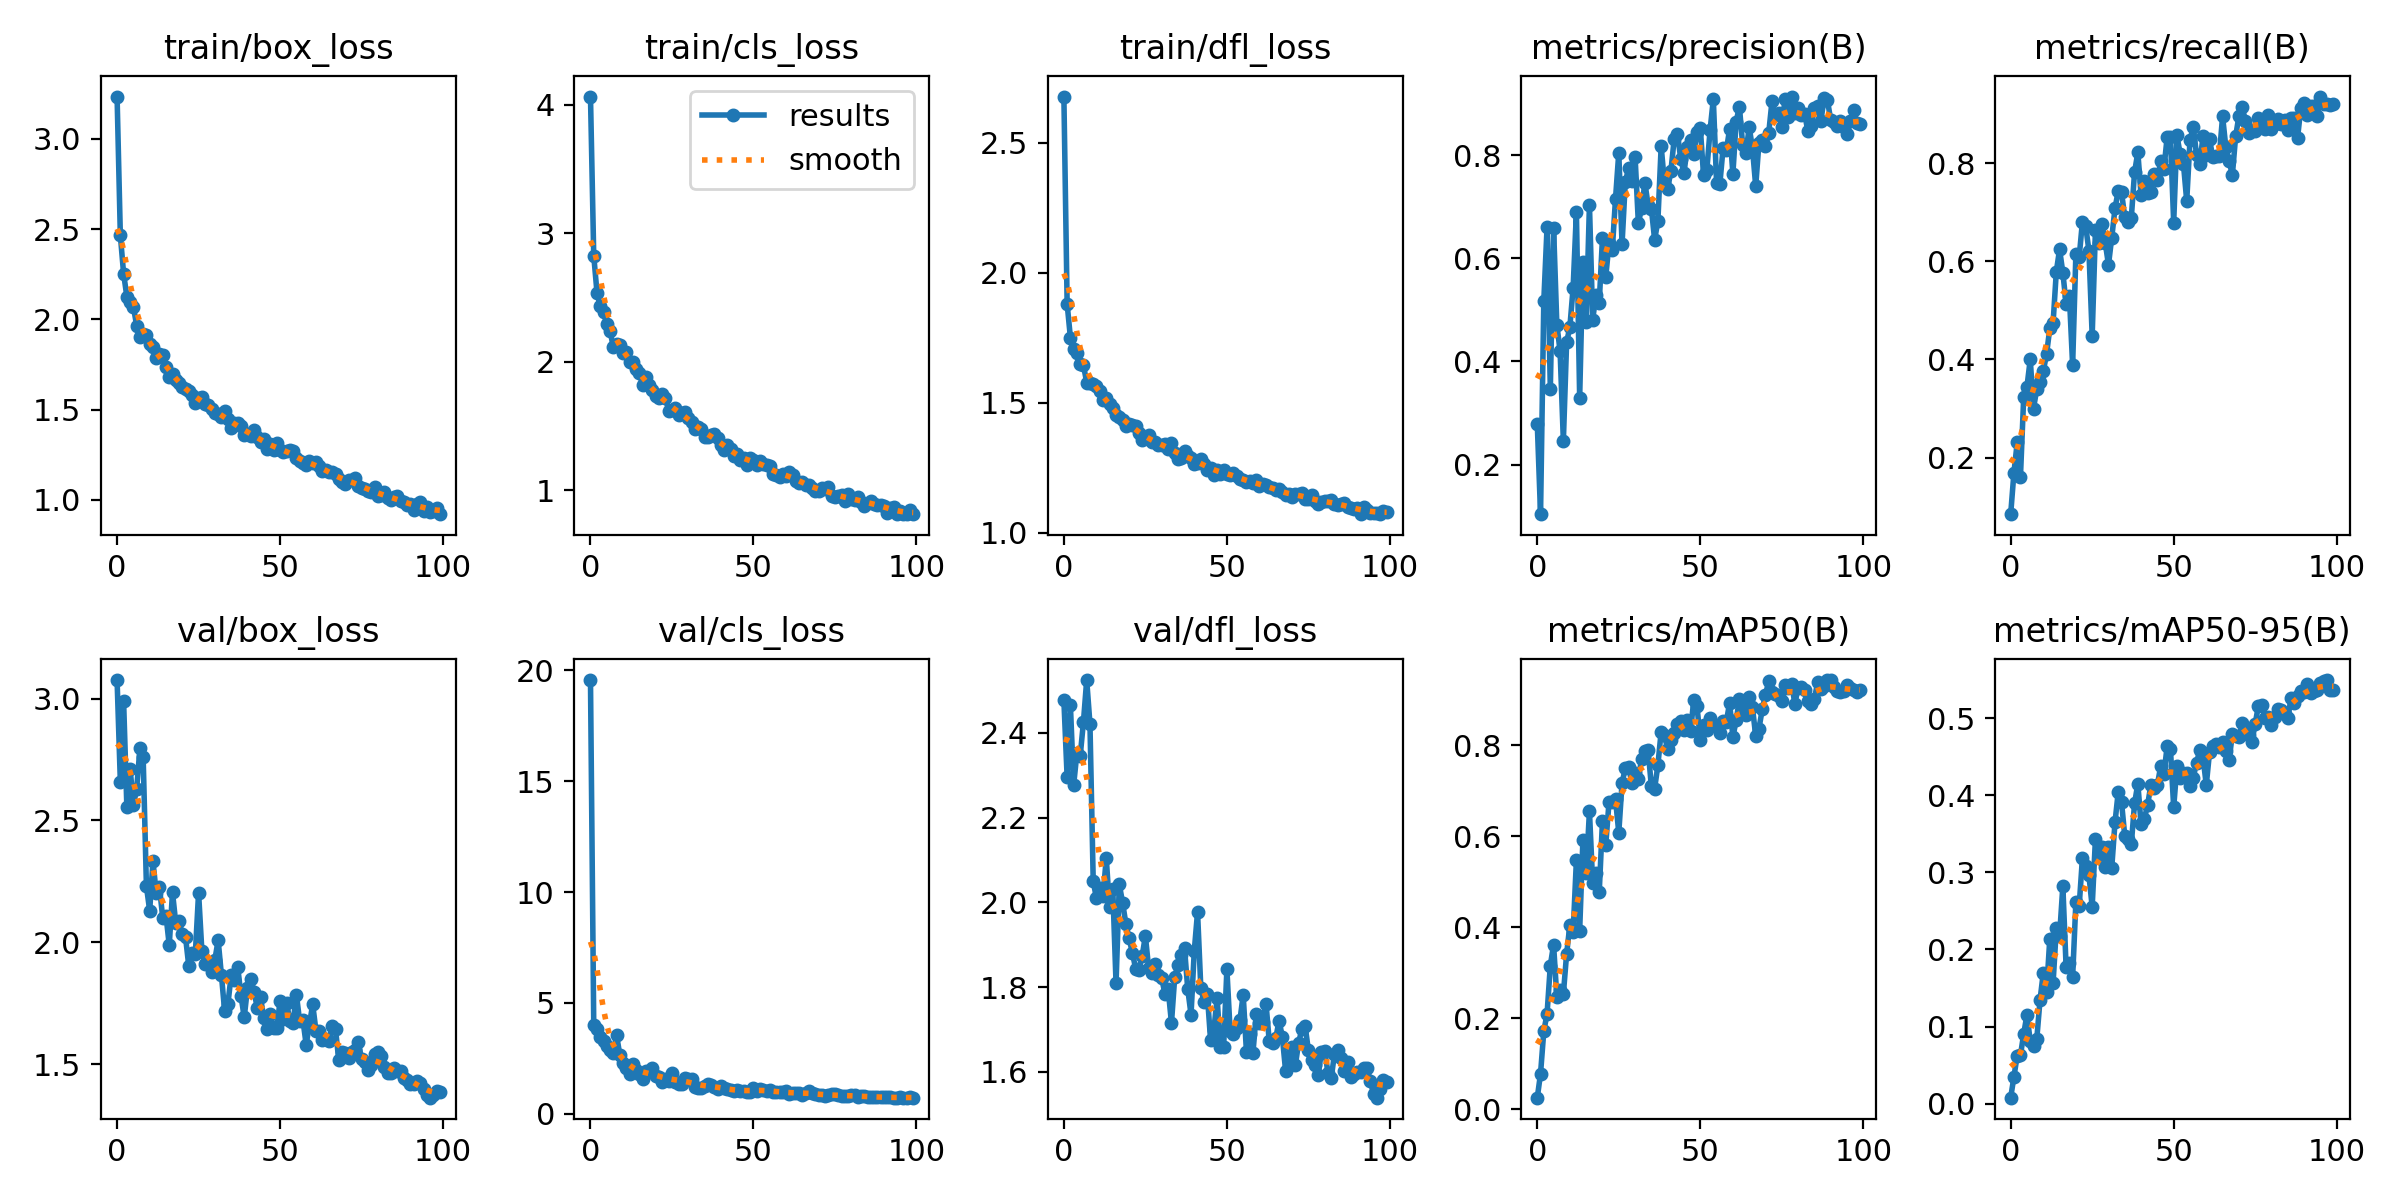

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


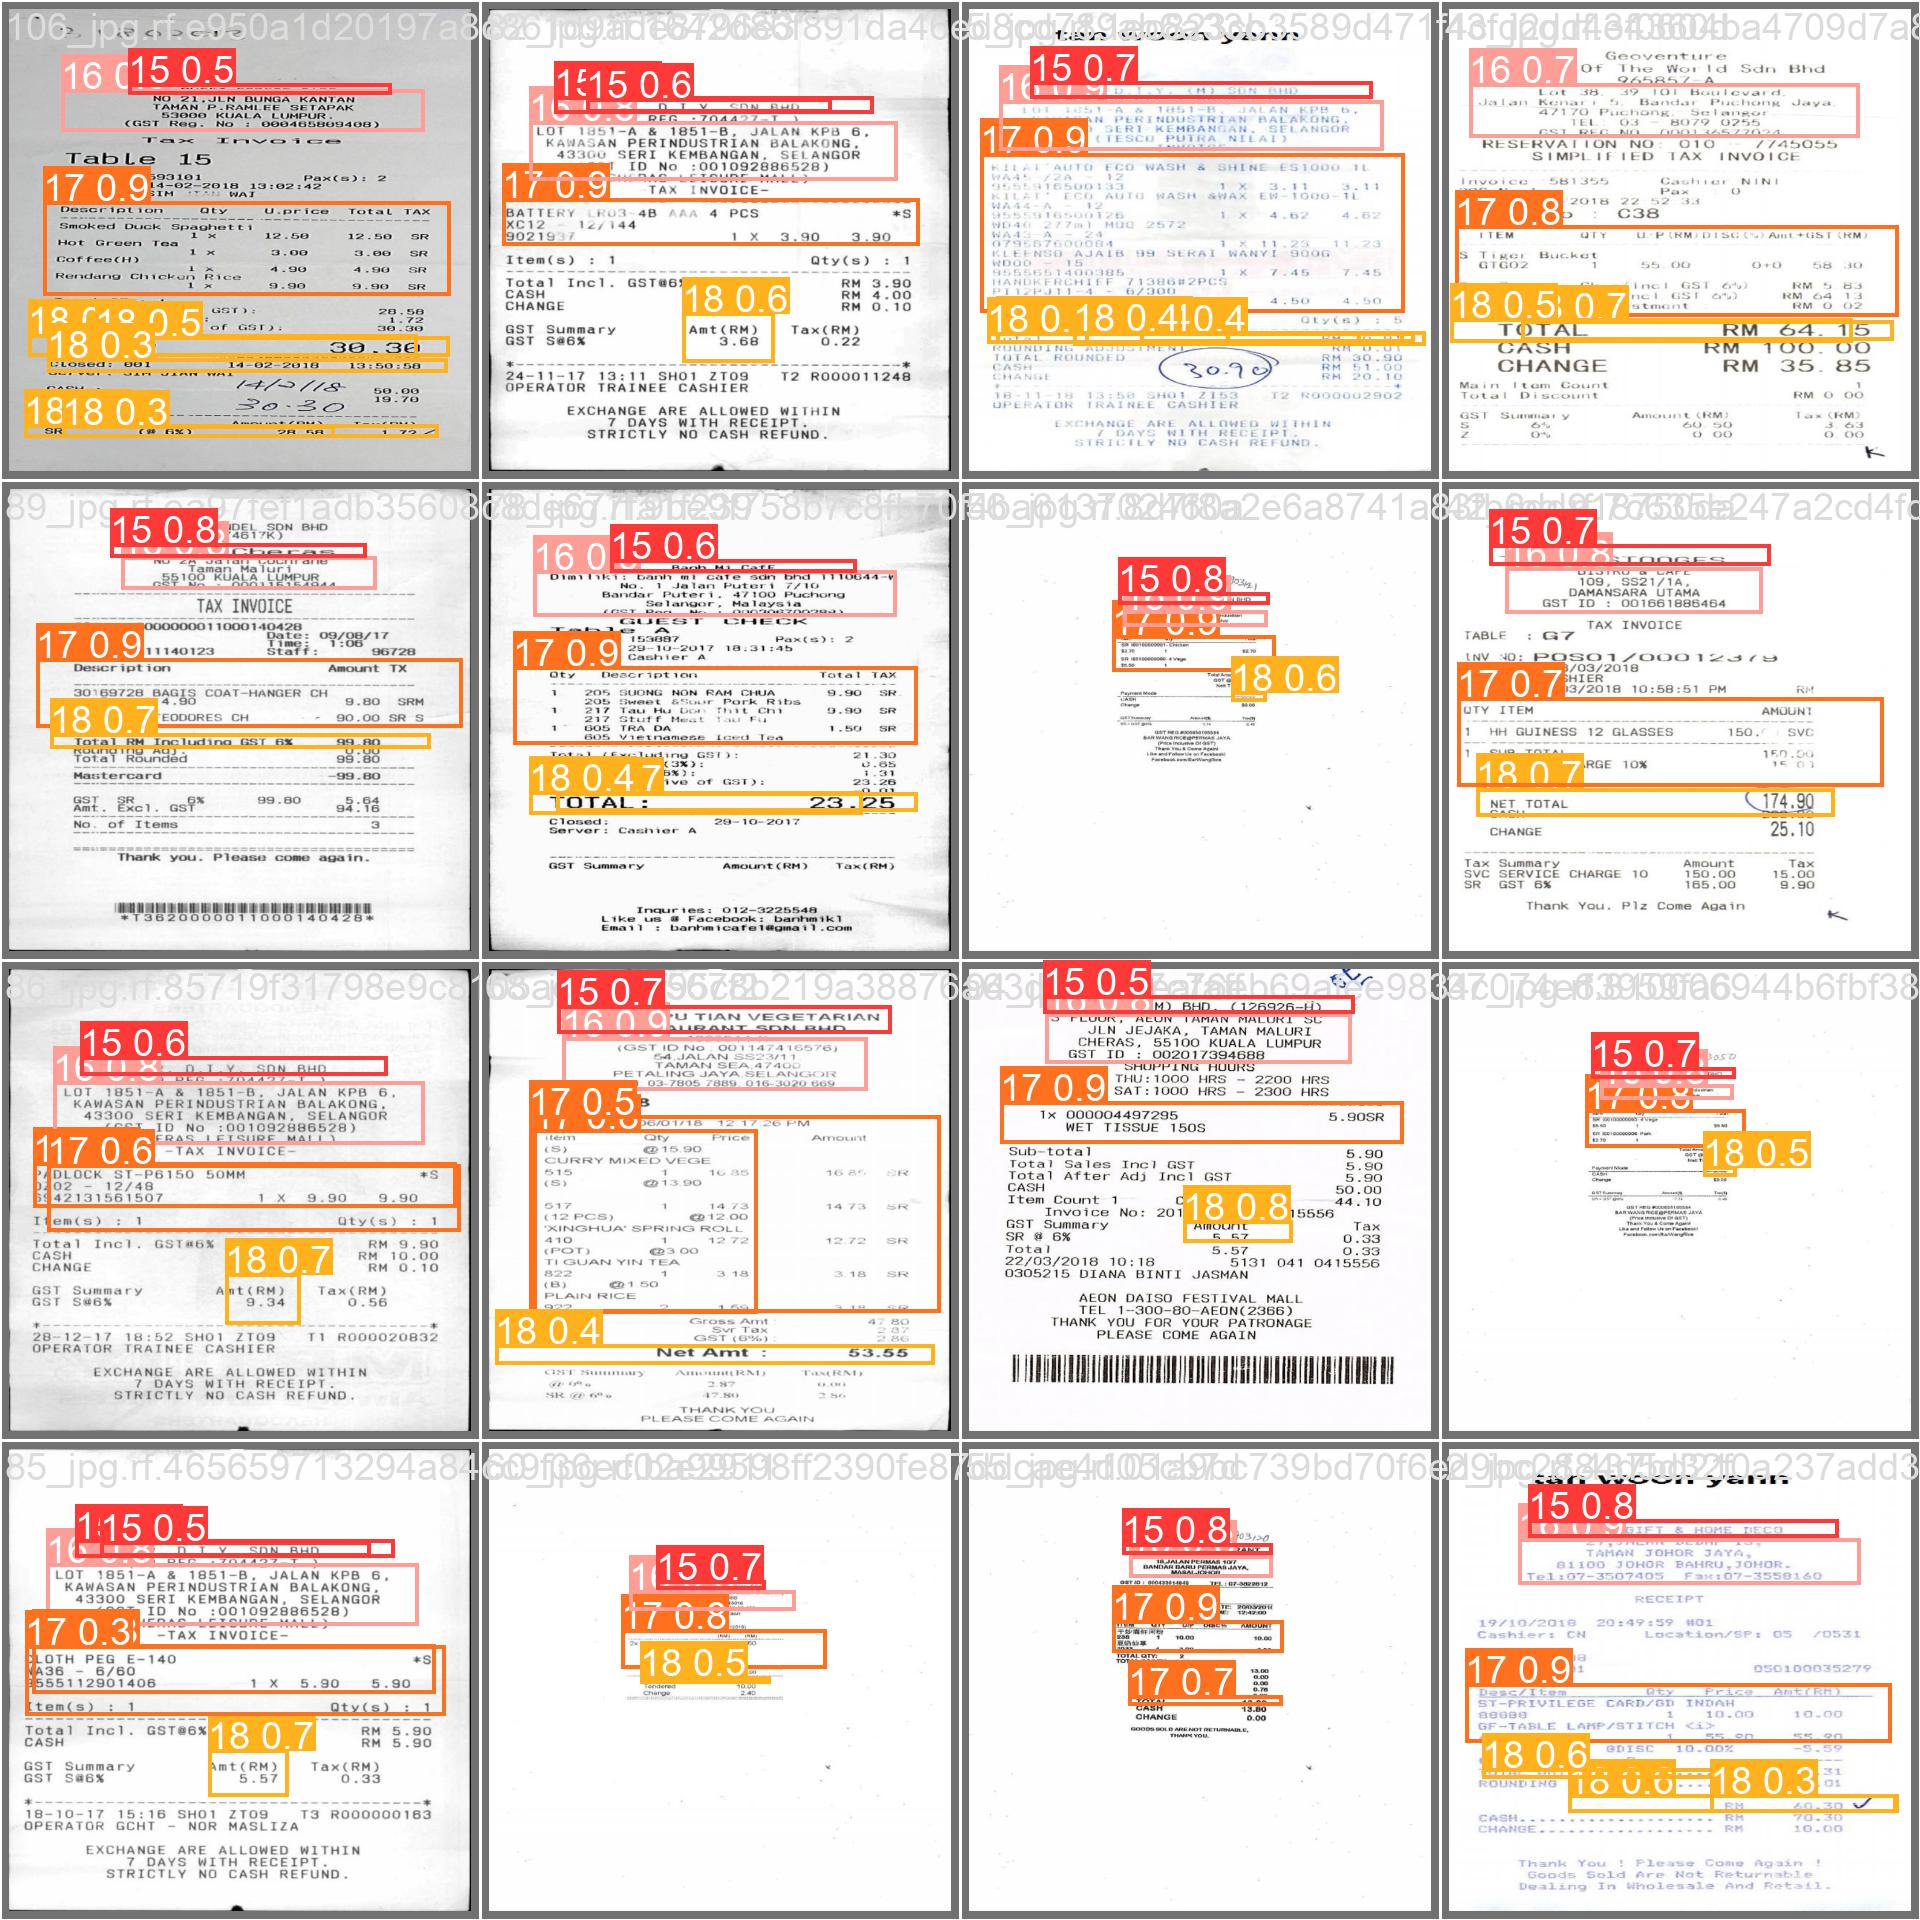

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [14]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.117 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients
val: Scanning /content/datasets/idp-1/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100% 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.72it/s]
                   all         23         92      0.889       0.92      0.921      0.547
                    15         23         23      0.874      0.903      0.872      0.388
                    16         23         23          1       0.98      0.995      0.632
                    17         23         24      0.903          1      0.989      0.749
                    18         23         22      0.778      0.798      0.828      0.418
Speed: 0.3ms preprocess, 27.5ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val


In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.117 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients

image 1/11 /content/datasets/idp-1/test/images/111_jpg.rf.375df90ec72063af0c0df4bd9d6a2b9c.jpg: 800x800 1 15, 1 16, 2 17s, 1 18, 24.8ms
image 2/11 /content/datasets/idp-1/test/images/22_jpg.rf.332ba87da1a1b142587eb85064c1b191.jpg: 800x800 1 15, 1 16, 1 17, 1 18, 24.6ms
image 3/11 /content/datasets/idp-1/test/images/25_jpg.rf.3fb73054219e9f5be601453c222a98eb.jpg: 800x800 1 15, 1 16, 1 17, 2 18s, 24.6ms
image 4/11 /content/datasets/idp-1/test/images/34_jpg.rf.26d0331ccbefa412f453c107a302fb1b.jpg: 800x800 1 15, 1 16, 1 17, 1 18, 24.6ms
image 5/11 /content/datasets/idp-1/test/images/40_jpg.rf.530b8c168e143e816cc899e40254df41.jpg: 800x800 2 15s, 1 16, 2 17s, 24.7ms
image 6/11 /content/datasets/idp-1/test/images/46_jpg.rf.fca1b52fe7c8ea373faef4e9f12e1bbe.jpg: 800x800 1 15, 1 16, 1 17, 2 18s, 24.6ms
image 7/11 /content/datasets/i

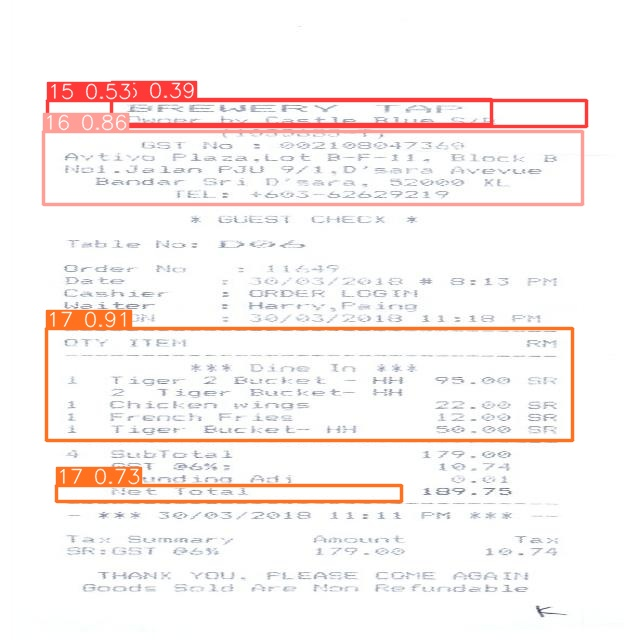

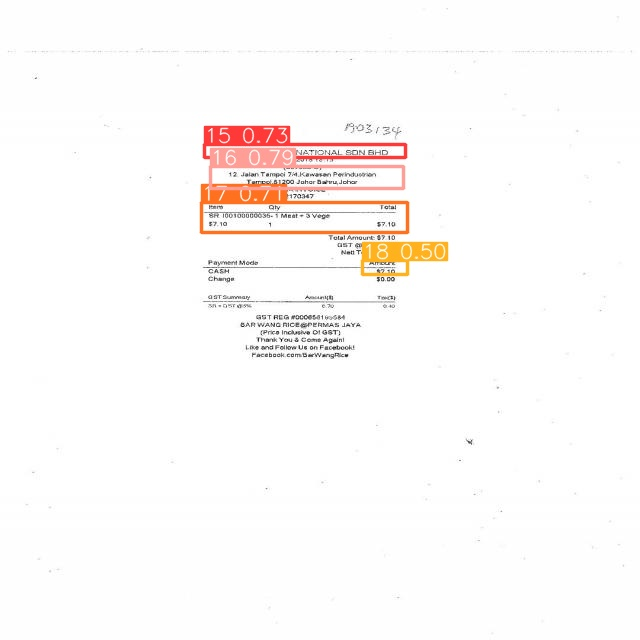

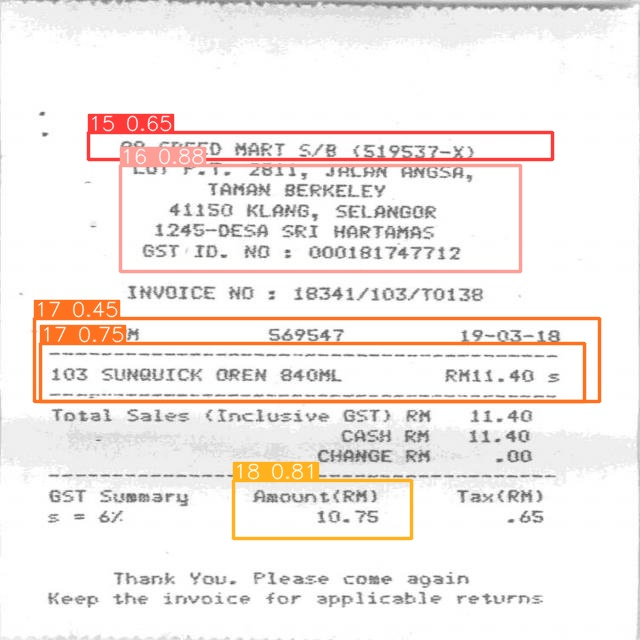

In [17]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")